In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

In [4]:
df=pd.read_csv('./employee/Train.csv')

In [5]:
df.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

In [7]:
for label in ['Work_Life_balance', 'Time_of_service', 'Pay_Scale', 'VAR2', 'VAR4', 'Age']:
    df = df[df[label].notna()]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5353 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                5353 non-null   object 
 1   Gender                     5353 non-null   object 
 2   Age                        5353 non-null   float64
 3   Education_Level            5353 non-null   int64  
 4   Relationship_Status        5353 non-null   object 
 5   Hometown                   5353 non-null   object 
 6   Unit                       5353 non-null   object 
 7   Decision_skill_possess     5353 non-null   object 
 8   Time_of_service            5353 non-null   float64
 9   Time_since_promotion       5353 non-null   int64  
 10  growth_rate                5353 non-null   int64  
 11  Travel_Rate                5353 non-null   int64  
 12  Post_Level                 5353 non-null   int64  
 13  Pay_Scale                  5353 non-null   float

In [9]:
print(df['Relationship_Status'].unique())

['Married' 'Single']


In [10]:
print(df['Hometown'].unique())

['Franklin' 'Springfield' 'Clinton' 'Lebanon' 'Washington']


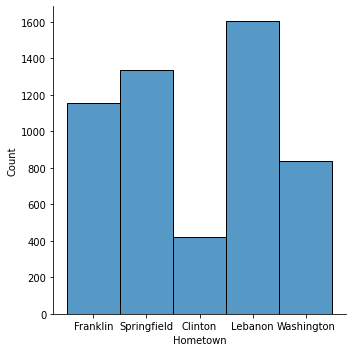

In [28]:
sns.displot(df['Hometown'])

In [43]:
print(df['Unit'].unique())

['IT' 'Logistics' 'Quality' 'Purchasing' 'Operarions' 'Sales'
 'Human Resource Management' 'Accounting and Finance' 'R&D' 'Marketing'
 'Production' 'Security']


In [45]:
print(df['Decision_skill_possess'].unique())

['Conceptual' 'Analytical' 'Directive' 'Behavioral']


In [13]:
per=df[['Gender','growth_rate']].groupby(['Gender']).agg('median')
per

,growth_rate
Gender,
F,48
M,47


c:\users\sapfi\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


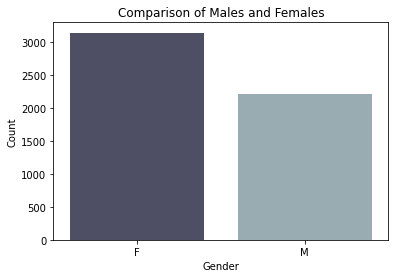

In [14]:
sns.countplot(df['Gender'], palette = 'bone')
plt.title('Comparison of Males and Females', fontweight = 30)
plt.xlabel('Gender')
plt.ylabel('Count');

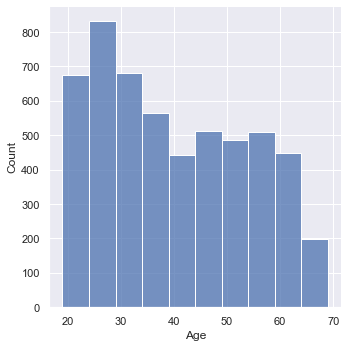

In [37]:
sns.displot(df['Age'], binwidth=5)

In [29]:
def prepare_ds(df):
    for label, content in df.items():
        # Check columns which *aren't* numeric
        if not pd.api.types.is_numeric_dtype(content):
            # We add the +1 because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1
    df = df.drop(['Employee_ID'], axis="columns")
    return df

In [30]:
ds = prepare_ds(df)

In [31]:
ds.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,1,42.0,4,1,2,3,3,4.0,4,33,...,3,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,2,24.0,3,2,4,4,1,5.0,4,36,...,3,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,1,58.0,3,1,1,9,3,27.0,3,51,...,3,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
4,1,31.0,1,1,4,4,3,5.0,4,62,...,4,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
5,2,54.0,3,1,3,8,3,19.0,1,21,...,3,1.0,3,-1.8176,1.8688,2.0,2,8,3,0.7613


In [32]:
x=ds.drop("Attrition_rate", axis=1)
y=ds.Attrition_rate.values

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.20, random_state = 42)

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(4282, 22)
(4282,)
(1071, 22)
(1071,)


In [33]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def show_scores(model):
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_val)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_val, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_val, val_preds),
              "Training R^2": model.score(x_train, y_train),
              "Valid R^2": model.score(x_val, y_val)}
    return scores

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [35]:
ideal_model = KNeighborsRegressor()

ideal_model.fit(x_train, y_train)

pprint(show_scores(ideal_model))

{'Training MAE': 0.11578244278374593,
 'Training RMSLE': 0.12334025835982311,
 'Training R^2': 0.21537989003769809,
 'Valid MAE': 0.13903335200746966,
 'Valid RMSLE': 0.1512961428712998,
 'Valid R^2': -0.19784467989818433}


In [36]:
ideal_model = DecisionTreeRegressor()

ideal_model.fit(x_train, y_train)

pprint(show_scores(ideal_model))

{'Training MAE': 0.0,
 'Training RMSLE': 0.0,
 'Training R^2': 1.0,
 'Valid MAE': 0.19123221288515407,
 'Valid RMSLE': 0.20807051728693113,
 'Valid R^2': -1.3715337431131456}


In [37]:
ideal_model = RandomForestRegressor(n_jobs=-1)
ideal_model.fit(x_train, y_train)

pprint(show_scores(ideal_model))

{'Training MAE': 0.050381344465203176,
 'Training RMSLE': 0.051829830017086194,
 'Training R^2': 0.8557560468387188,
 'Valid MAE': 0.13596325116713354,
 'Valid RMSLE': 0.14254971657376816,
 'Valid R^2': -0.059174842680757234}


In [38]:
print(np.array(y_val))
print(ideal_model.predict(x_val))

[0.0989 0.0869 0.227  ... 0.1761 0.025  0.1468]
[0.155913 0.18668  0.18304  ... 0.280119 0.198857 0.15333 ]


In [39]:
ideal_model = GradientBoostingRegressor()

ideal_model.fit(x_train, y_train)

pprint(show_scores(ideal_model))

{'Training MAE': 0.11924771539811059,
 'Training RMSLE': 0.12944857579944424,
 'Training R^2': 0.12853061090237228,
 'Valid MAE': 0.12895000672761778,
 'Valid RMSLE': 0.1395302455039527,
 'Valid R^2': -0.034371446479695145}
